У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи бібліотеки `seaborn`. Це дозволяє будувати гарніні візуалізації, а іноді також робити це швидше, ніж з `matplotlib`.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot`, `seaborn` та `pandas`.  Завантажте дані з файла `yulu_rental.csv` у `pandas.DataFrame` `df`.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../../Data/mod 4/yulu_rental.csv')

1. Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `humidity` та `count`, зазначивши колір точки в відповідності до значення змінної `weather`. Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

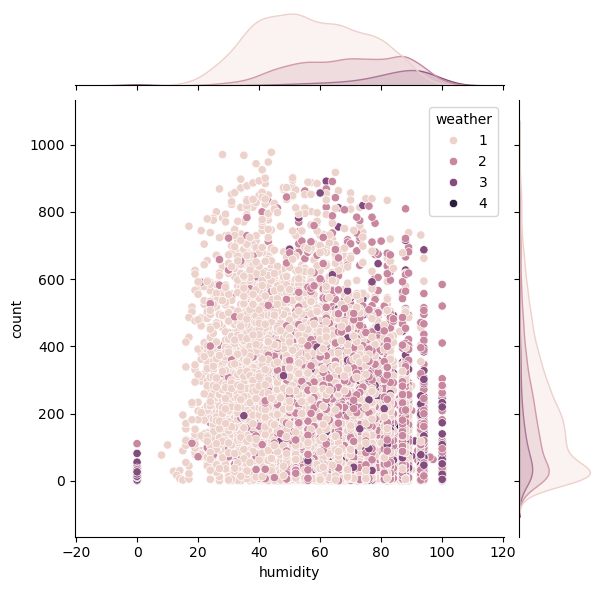

In [8]:
sns.jointplot(x = df['humidity'],y = df['count'], hue = df['weather']);

From what is obvious: during warm, dry weather, the humidity is mostly low, ranging from 18% to 60%. The more rainy the weather, the higher the humidity. However, according to this graph, I wouldn't say that the number of registrations increases in drier weather.

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=16BksRhZzoz4ynPKCPjXEek56XBsAEF6T)

2. Відфільтруйте і збережіть в окремій змінній лише дані з сезоно "весна" і "літо" (звернітся до опису даних вгорі ноутбуку, аби зрозуміти, які значення вам треба обрати.
Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `casual` та `registered`, зазначивши колір точки в відповідності до значення змінної `season`. Встановіть прозорість на 0.2.

Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

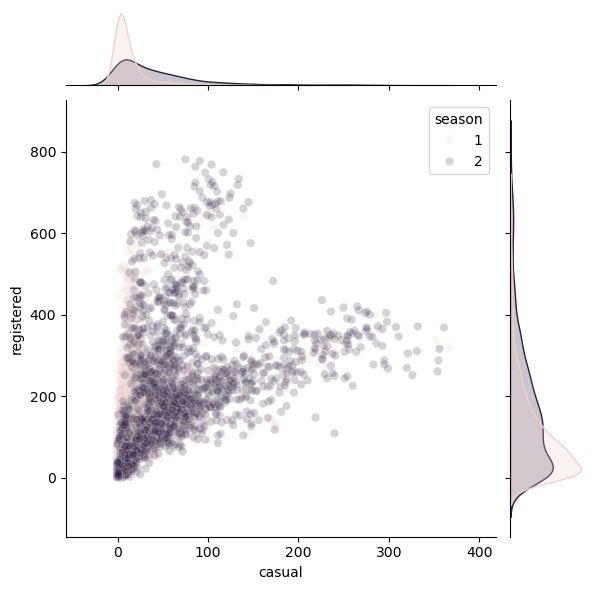

In [38]:
filter_spring_summer = df[df['season'].isin([1, 2])]
sns.jointplot(x = filter_spring_summer['casual'],y = filter_spring_summer['registered'], hue = filter_spring_summer['season'], alpha = .2);

The number of users in the summer clearly exceeds the number of users in the spring.
In the summer, there is also a trend where more casual users become registered users. This suggests that in the summer, the site likely has more offers and promotions, leading to better customer engagement and long-term relationships.
I would recommend that the business start "preparing for summer" earlier: for example, by renting out bicycles in advance, organizing promotional campaigns, offering rides on closed bike tracks, etc.

3. Для дослідження як розподілу значень  `humidity` в залежності від погоди (`weather`) побудуйте візуалізацію типу "ящик з вусами" (box plot)користуючись відповідним методом бібліотеки seaborn:

https://seaborn.pydata.org/generated/seaborn.boxplot.html


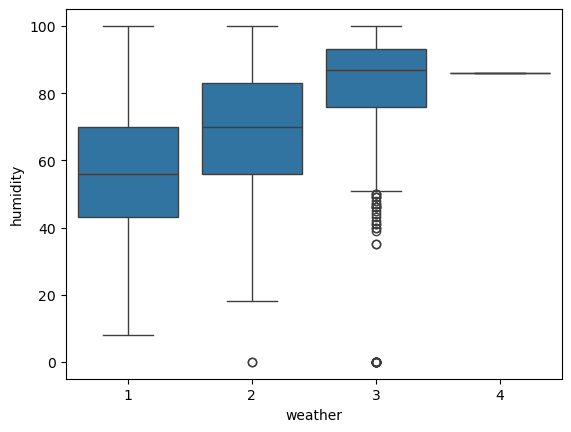

In [41]:
sns.boxplot(x = df['weather'],y = df['humidity']);

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1_6CBacvDlbuV1XD9GNoGn9sJOSfr74pS)


4. Використайте бібліотеку Seaborn для створення **парних графіків** (pairplot) розсіювання, які показуватимуть взаємозв'язки між кількістю зареєстрованих, неформальних користувачів та загальною кількістю велосипедів, взятих на прокат. Кожен графік повинен розрізняти робочі та святкові дні за кольором.

Для побудови цієї візуалізації спочатку відфільтруйте потрібні колонки в даних і потім зробіть візуалізацію.

Проаналізуйте візуалізацію і скажіть, чи можна виявити особливу поведінку користувачів у святкові дні з цих графіків?

<Figure size 500x500 with 0 Axes>

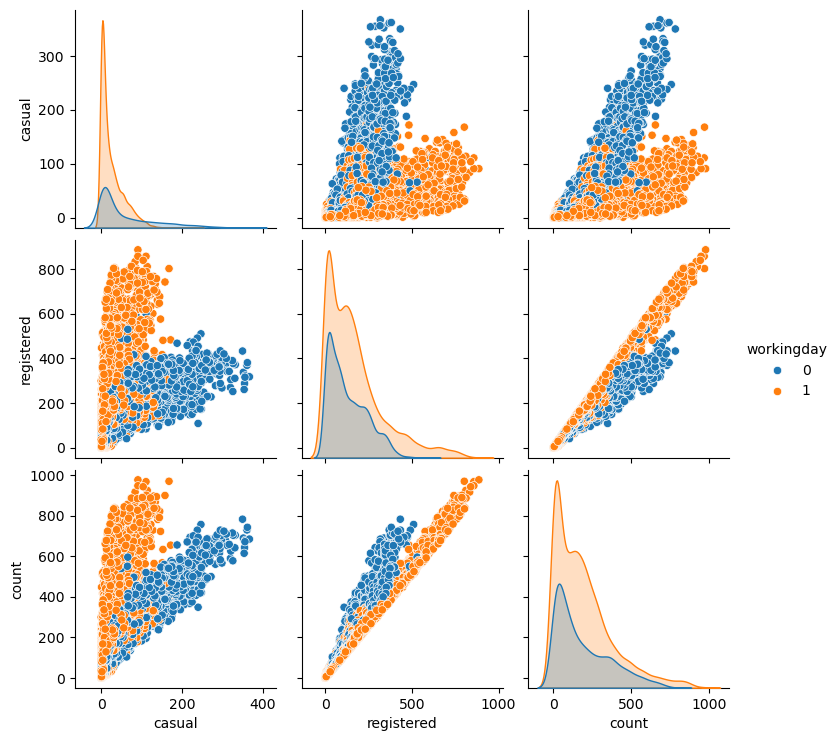

In [58]:
filter_bike_users = df[['casual', 'registered', 'count', 'workingday']]
plt.figure(figsize=(5,5))
sns.pairplot(data=filter_bike_users, hue='workingday');

The graph reveals the following trend:
- Registered users are more likely to rent bicycles specifically on weekdays. This could be because they use the transport to commute to work. Consequently, they register to take advantage of promotions, loyalty programs, and to see where available bikes are located.
- On the other hand, casual users are more active on weekends, indicating they use bicycles for leisure activities. Therefore, they do not register as they are not interested in the company's services on a regular basis.

5. Змініть тип даних колонки `datetime` на `pandas.datetime`.

In [312]:
df.date = pd.to_datetime(df.date)

 Тепер давайте візуалізуємо кількість зареєстрованих та казуальних користувачів поденно. Для цього виконайте код нижче і після цього створіть нову змінну `df_viz` яка містить лише колонки `'date', 'registered', 'casual'`, згрупуйте дані за датою і відобразіть на **одному** графіку поденну динаміку двох показників з допомогою `pandas.plot`.

In [314]:
df['date'] = df.datetime.dt.date

In [346]:
df_viz = df.pivot_table(index='date', values=['registered', 'casual'], aggfunc='sum')

In [353]:
df_viz.plot('date','registered', figsize=(10,6))

KeyError: 'date'

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1XGBqmFLXiI_v-MBEOiCQNyW6sUpvII1n)
